In [1]:
!pip install yfinance
!pip install bs4

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [7]:
# 1: Use yfinance to Extract Stock Data

In [9]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch HTML with a user-agent header (to avoid blocking)
headers = {'User-Agent': 'Mozilla/5.0'}
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')  # Using lxml parser

# Find all tables and check for revenue data
tables = soup.find_all('table')
tesla_revenue = pd.DataFrame()

for table in tables:
    headers = str(table.find_all('th'))  # Get all table headers
    if "Revenue" in headers:
        tesla_revenue = pd.read_html(str(table))[0]
        tesla_revenue.columns = ['Date', 'Revenue']  # Rename columns
        break

if not tesla_revenue.empty:
    # Clean data (remove $ and commas)
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r',|\$', '', regex=True)
    tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
    tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
    print(tesla_revenue.tail())
else:
    print("Error: Revenue table not found. Check website structure.")

    Date  Revenue
11  2013     2013
12  2012      413
13  2011      204
14  2010      117
15  2009      112


C:\Users\dhair\AppData\Local\Temp\ipykernel_14764\2415204161.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [15]:
import yfinance as yf

# Get GameStop stock data (with error handling)
try:
    gme = yf.Ticker("GME")
    gme_data = gme.history(period="max")
    print("GameStop Stock Data:")
    print(gme_data.head())
except Exception as e:
    print(f"Error fetching GameStop data: {e}")

GameStop Stock Data:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [17]:
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
try:
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, 'lxml')
    
    gme_revenue = pd.DataFrame()
    for table in soup.find_all('table'):
        if "GameStop Quarterly Revenue" in str(table):
            gme_revenue = pd.read_html(StringIO(str(table)))[0]
            gme_revenue.columns = ['Date', 'Revenue']
            break
    
    if not gme_revenue.empty:
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r',|\$', '', regex=True)
        gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
        gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
        print("\nGameStop Revenue Data:")
        print(gme_revenue.tail())
    else:
        print("Error: GameStop revenue table not found")
except Exception as e:
    print(f"Scraping error: {e}")


GameStop Revenue Data:
          Date  Revenue
60  2010-01-31     3524
61  2009-10-31     1835
62  2009-07-31     1739
63  2009-04-30     1981
64  2009-01-31     3492


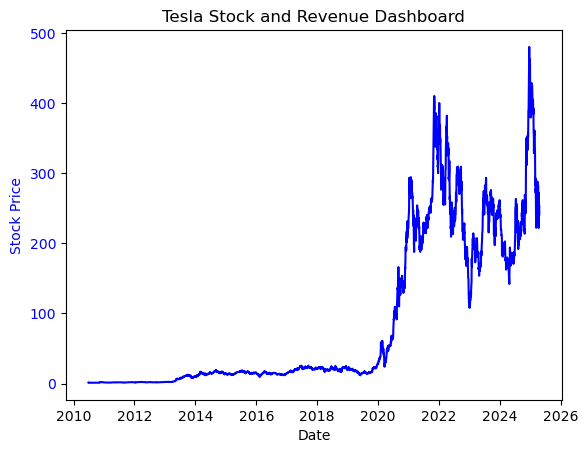

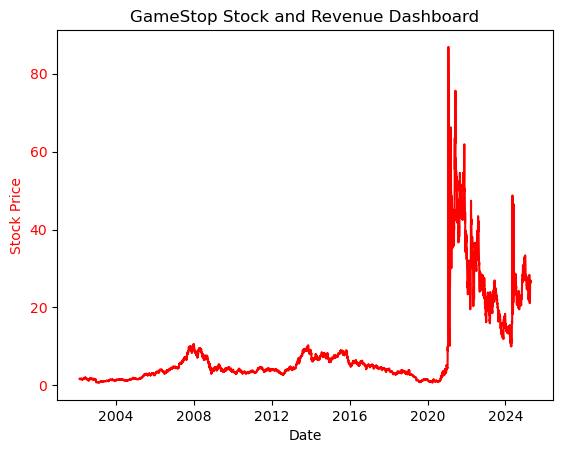

In [19]:
# Import necessary libraries
import yfinance as yf
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

# Function to extract stock data using yfinance
def get_stock_data(ticker):
    stock = yf.Ticker(ticker)
    stock_data = stock.history(period="max")
    return stock_data

# Function to scrape revenue data from a website
def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    # Example: Extracting revenue data from a table
    tables = soup.find_all('table')
    for table in tables:
        if "Revenue" in str(table):
            df = pd.read_html(str(table))[0]
            return df
    return None

# Extract Tesla stock data
tesla_stock_data = get_stock_data("TSLA")
tesla_stock_data.reset_index(inplace=True)

# Extract Tesla revenue data (replace with actual URL)
tesla_revenue_url = "https://example.com/tesla-revenue"
tesla_revenue_data = get_revenue_data(tesla_revenue_url)

# Extract GameStop stock data
gamestop_stock_data = get_stock_data("GME")
gamestop_stock_data.reset_index(inplace=True)

# Extract GameStop revenue data (replace with actual URL)
gamestop_revenue_url = "https://example.com/gamestop-revenue"
gamestop_revenue_data = get_revenue_data(gamestop_revenue_url)

# Plot Tesla stock and revenue data
def plot_tesla_dashboard():
    fig, ax1 = plt.subplots()

    # Plot stock data
    ax1.plot(tesla_stock_data['Date'], tesla_stock_data['Close'], color='blue', label='Tesla Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot revenue data
    if tesla_revenue_data is not None:
        ax2 = ax1.twinx()
        ax2.plot(tesla_revenue_data['Date'], tesla_revenue_data['Revenue'], color='green', label='Tesla Revenue')
        ax2.set_ylabel('Revenue', color='green')
        ax2.tick_params(axis='y', labelcolor='green')

    plt.title('Tesla Stock and Revenue Dashboard')
    plt.show()

# Plot GameStop stock and revenue data
def plot_gamestop_dashboard():
    fig, ax1 = plt.subplots()

    # Plot stock data
    ax1.plot(gamestop_stock_data['Date'], gamestop_stock_data['Close'], color='red', label='GameStop Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    # Plot revenue data
    if gamestop_revenue_data is not None:
        ax2 = ax1.twinx()
        ax2.plot(gamestop_revenue_data['Date'], gamestop_revenue_data['Revenue'], color='orange', label='GameStop Revenue')
        ax2.set_ylabel('Revenue', color='orange')
        ax2.tick_params(axis='y', labelcolor='orange')

    plt.title('GameStop Stock and Revenue Dashboard')
    plt.show()

# Call the functions to display dashboards
plot_tesla_dashboard()
plot_gamestop_dashboard()